**Question 3**: -
Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.
Note - Write comments wherever necessary explaining the code written.
Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json
Data Attributes - id: Identification Number - int num: Number of the
● Pokémon in the official Pokédex - int name: Pokémon name -
● string img: URL to an image of this Pokémon - string type:
● Pokémon type -string height: Pokémon height - float
● weight: Pokémon weight - float candy: type of candy used to evolve Pokémon or
given
● when transferred - string candy_count: the amount of candies required to evolve
- int
● egg: Number of kilometers to travel to hatch the egg - float spawn_chance:
● Percentage of spawn chance (NEW) - float avg_spawns: Number of this
pokemon on 10.000 spawns (NEW) - int
● spawn_time: Spawns most active at the time on this field. Spawn times are the same for all
time zones and are expressed in local time. (NEW) - “minutes: seconds” multipliers:
Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int
weakness: Types of
● Pokémon this Pokémon is weak to - list of strings next_evolution: Number and Name of
successive evolutions of Pokémon - list of dict prev_evolution: Number and Name of previous
evolutions of Pokémon - - list of dict

**Ans**

In [3]:
import requests
import pandas as pd

def download_data(link):
    """
    Downloads data from the provided link.

    Args:
        link: The link to the data.

    Returns:
        The data as a Pandas DataFrame.
    """

    response = requests.get(link)
    if response.status_code == 200:
        data = response.json()
        return pd.DataFrame(data)
    else:
        raise Exception("Error downloading data: {}".format(response.status_code))
        
        
        
        
def read_data(data):
    """
    Reads the data and converts it into properly structured data.

    Args:
        data: The data as a Pandas DataFrame.

    Returns:
        The data as properly structured data.
    """


    # Convert the data into a properly structured format
    structured_data = []
    for pokemon in data['pokemon']:
        multipliers = pokemon.get('multipliers', [])
        multipliers_str = ', '.join(map(str, multipliers)) if multipliers else ''
        
        attributes = {
            'id': pokemon.get('id', ''),
            'num': pokemon.get('num', ''),
            'name': pokemon.get('name', ''),
            'img': pokemon.get('img', ''),
            'type': ', '.join(pokemon.get('type', [])),
            'height': pokemon.get('height', ''),
            'weight': pokemon.get('weight', ''),
            'candy': pokemon.get('candy', ''),
            'candy_count': pokemon.get('candy_count', ''),
            'egg': pokemon.get('egg', ''),
            'spawn_chance': pokemon.get('spawn_chance', ''),
            'avg_spawns': pokemon.get('avg_spawns', ''),
            'spawn_time': pokemon.get('spawn_time', ''),
            'multipliers': multipliers_str,
            'weakness': ', '.join(pokemon.get('weaknesses', []))
        }
        structured_data.append(attributes)

    return structured_data




def write_data_to_excel(data, filename):
    """
    Writes the data to an Excel file.

    Args:
        data: The data as a Pandas DataFrame.
        filename: The name of the Excel file.
    """

    # Convert the structured data to a DataFrame
    df = pd.DataFrame(data)

    # Export the data to Excel format
    df.to_excel(filename, index=False)


if __name__ == "__main__":
    # Get the link to the data
    link = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

    # Download the data
    data = download_data(link)

    # Read the data and convert it into properly structured data
    structured_data = read_data(data)

    # Write the data to an Excel file
    write_data_to_excel(structured_data, "Excel_Csv\pokemon.xlsx")


**Question 6** -
Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%
● Get all Pokemons that have less than 4 weaknesses
● Get all Pokemons that have no multipliers at all
● Get all Pokemons that do not have more than 2 evolutions
● Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
● Get all Pokemon who have more than two types of capabilities

**Ans**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Excel_Csv\pokemon.xlsx')

In [3]:
df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weakness
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,1.58,"Fire, Ice, Flying, Psychic"
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"1.2, 1.6","Fire, Ice, Flying, Psychic"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,NaN,"Fire, Ice, Flying, Psychic"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,1.65,"Water, Ground, Rock"
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,1.79,"Water, Ground, Rock"


### Get all Pokemons whose spawn rate is less than 5%

In [4]:
df.columns

Index(['id', 'num', 'name', 'img', 'type', 'height', 'weight', 'candy',
       'candy_count', 'egg', 'spawn_chance', 'avg_spawns', 'spawn_time',
       'multipliers', 'weakness'],
      dtype='object')

In [5]:
# In the dataset spawn rate column is not given
# consider spawn_chance


pokemons_spawn_rate_less_5percent =  df[df['spawn_chance'] < 0.5]
pokemons_spawn_rate_less_5percent

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weakness
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"1.2, 1.6","Fire, Ice, Flying, Psychic"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,NaN,"Fire, Ice, Flying, Psychic"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,1.65,"Water, Ground, Rock"
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,1.79,"Water, Ground, Rock"
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"Fire, Flying",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,NaN,"Water, Electric, Rock"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"1.83, 1.84","Ice, Dragon, Fairy"
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,2.05,"Ice, Dragon, Fairy"
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon, Flying",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,NaN,"Ice, Rock, Dragon, Fairy"
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,NaN,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"Bug, Ghost, Dark"


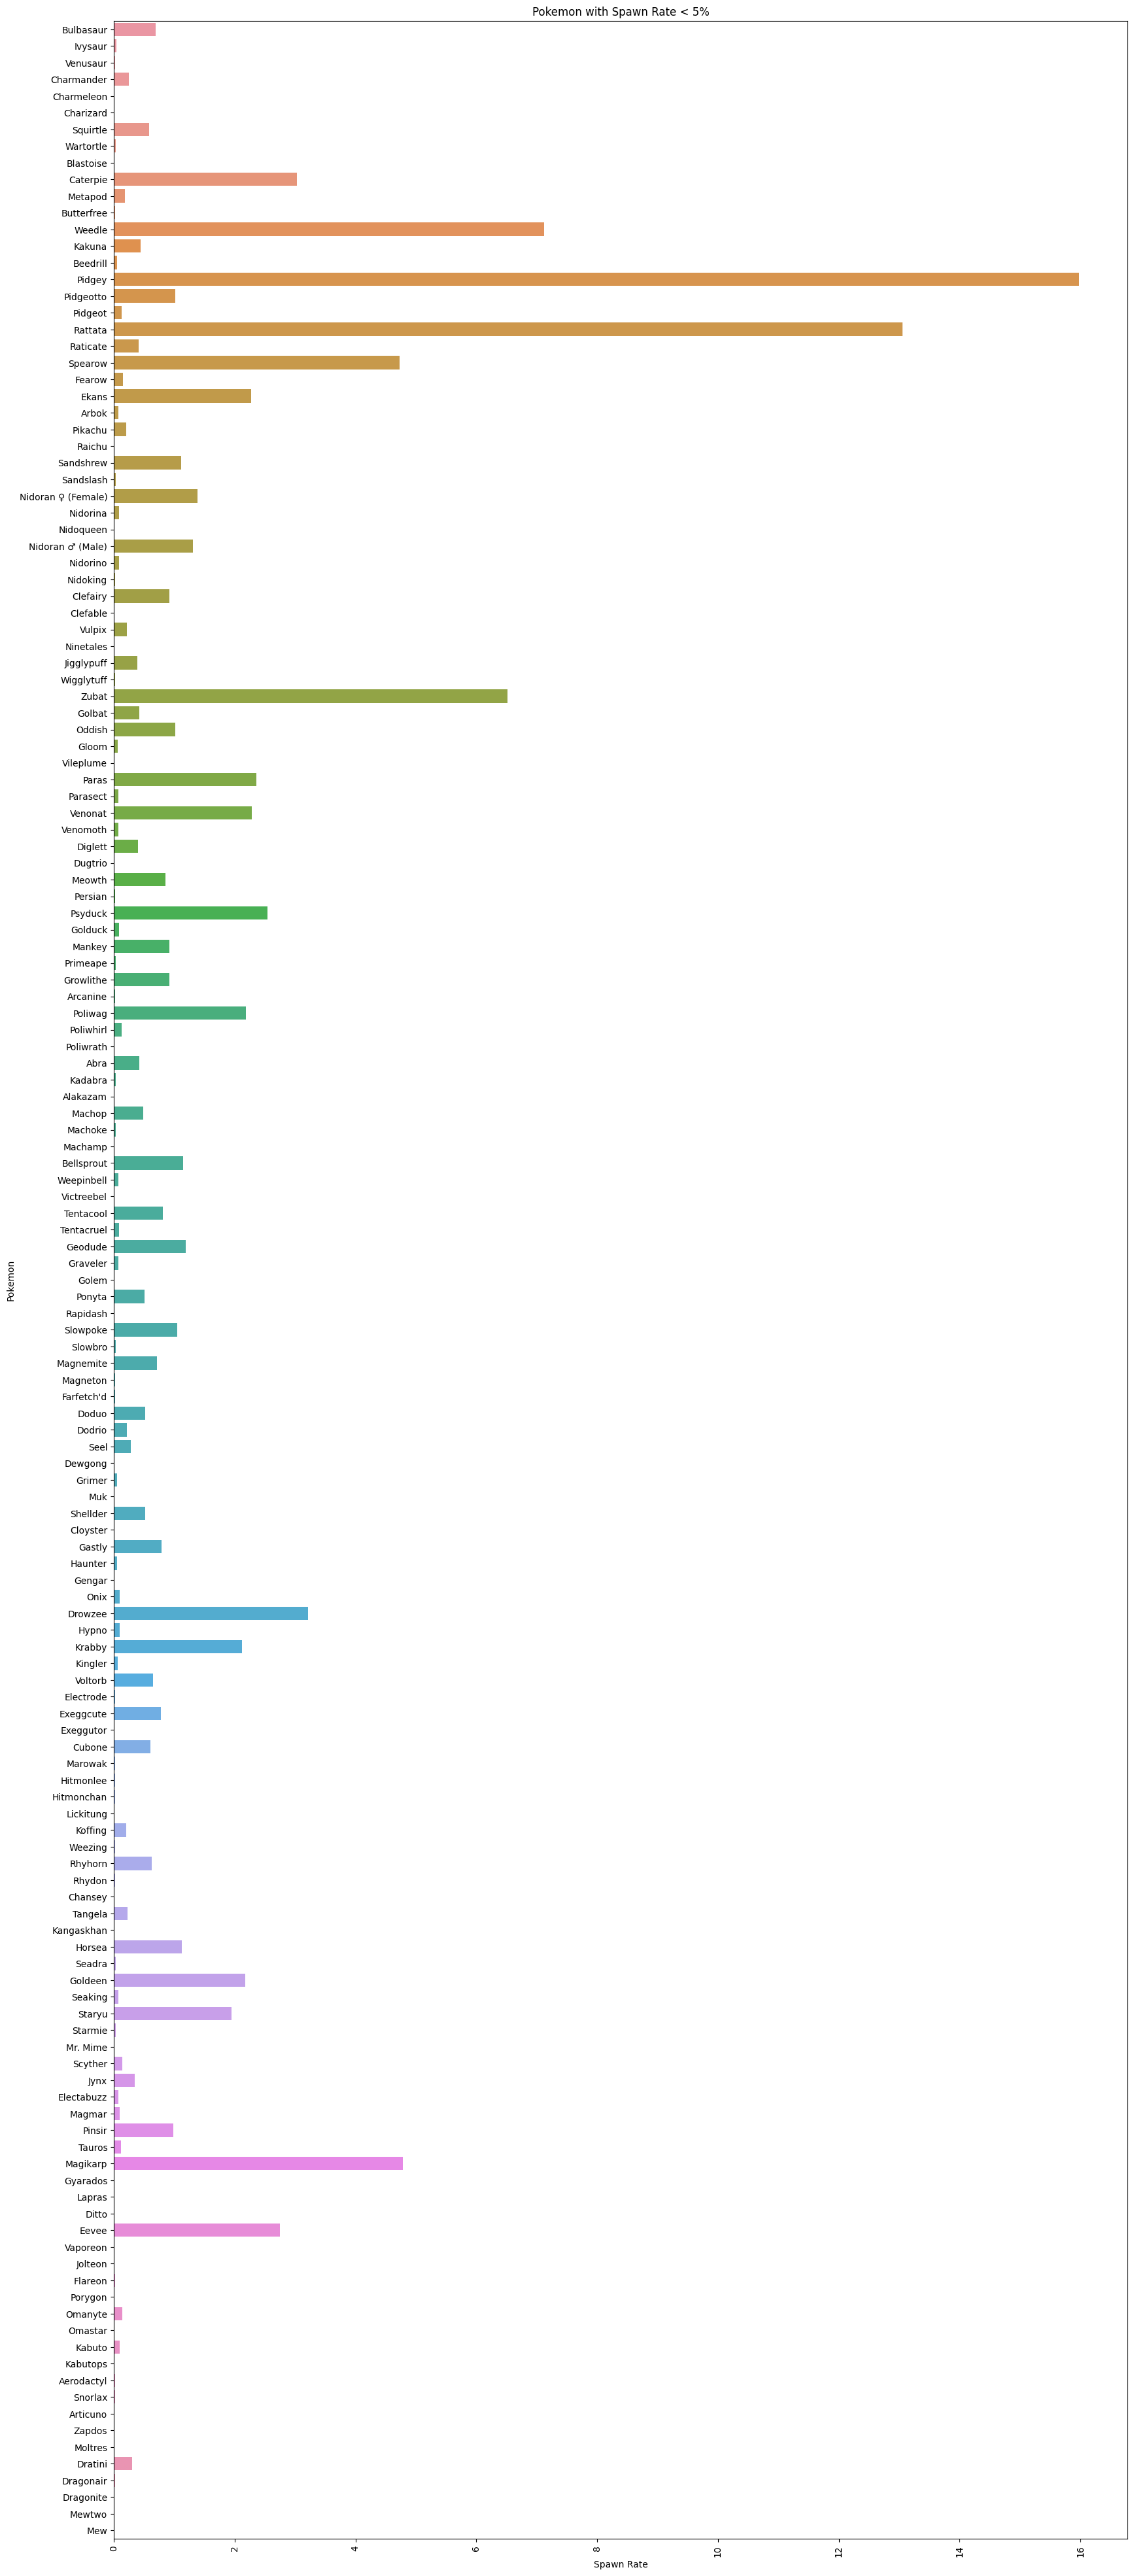

In [6]:
# Create a bar plot
plt.figure(figsize=(20,50))
sns.barplot(x ='spawn_chance', y ='name',data=df)

# Customize the plot

plt.title('Pokemon with Spawn Rate < 5%')
plt.xlabel('Spawn Rate')
plt.ylabel('Pokemon')

# Display the plot
plt.show()

### Get all Pokemons that have less than 4 weaknesses

In [36]:
Pokemons_less_than_4_weaknesses =df[df['weakness'].str.count(',') < 3]  # count less than 3 comma
Pokemons_less_than_4_weaknesses = Pokemons_less_than_4_weaknesses[['name','weakness']]
Pokemons_less_than_4_weaknesses['weakness_count']=Pokemons_less_than_4_weaknesses['weakness'].str.count(',') + 1  # count comma
Pokemons_less_than_4_weaknesses

,name,weakness,weakness_count
3,Charmander,"Water, Ground, Rock",3
4,Charmeleon,"Water, Ground, Rock",3
5,Charizard,"Water, Electric, Rock",3
6,Squirtle,"Electric, Grass",2
7,Wartortle,"Electric, Grass",2
...,...,...,...
145,Moltres,"Water, Electric, Rock",3
146,Dratini,"Ice, Dragon, Fairy",3
147,Dragonair,"Ice, Dragon, Fairy",3
149,Mewtwo,"Bug, Ghost, Dark",3


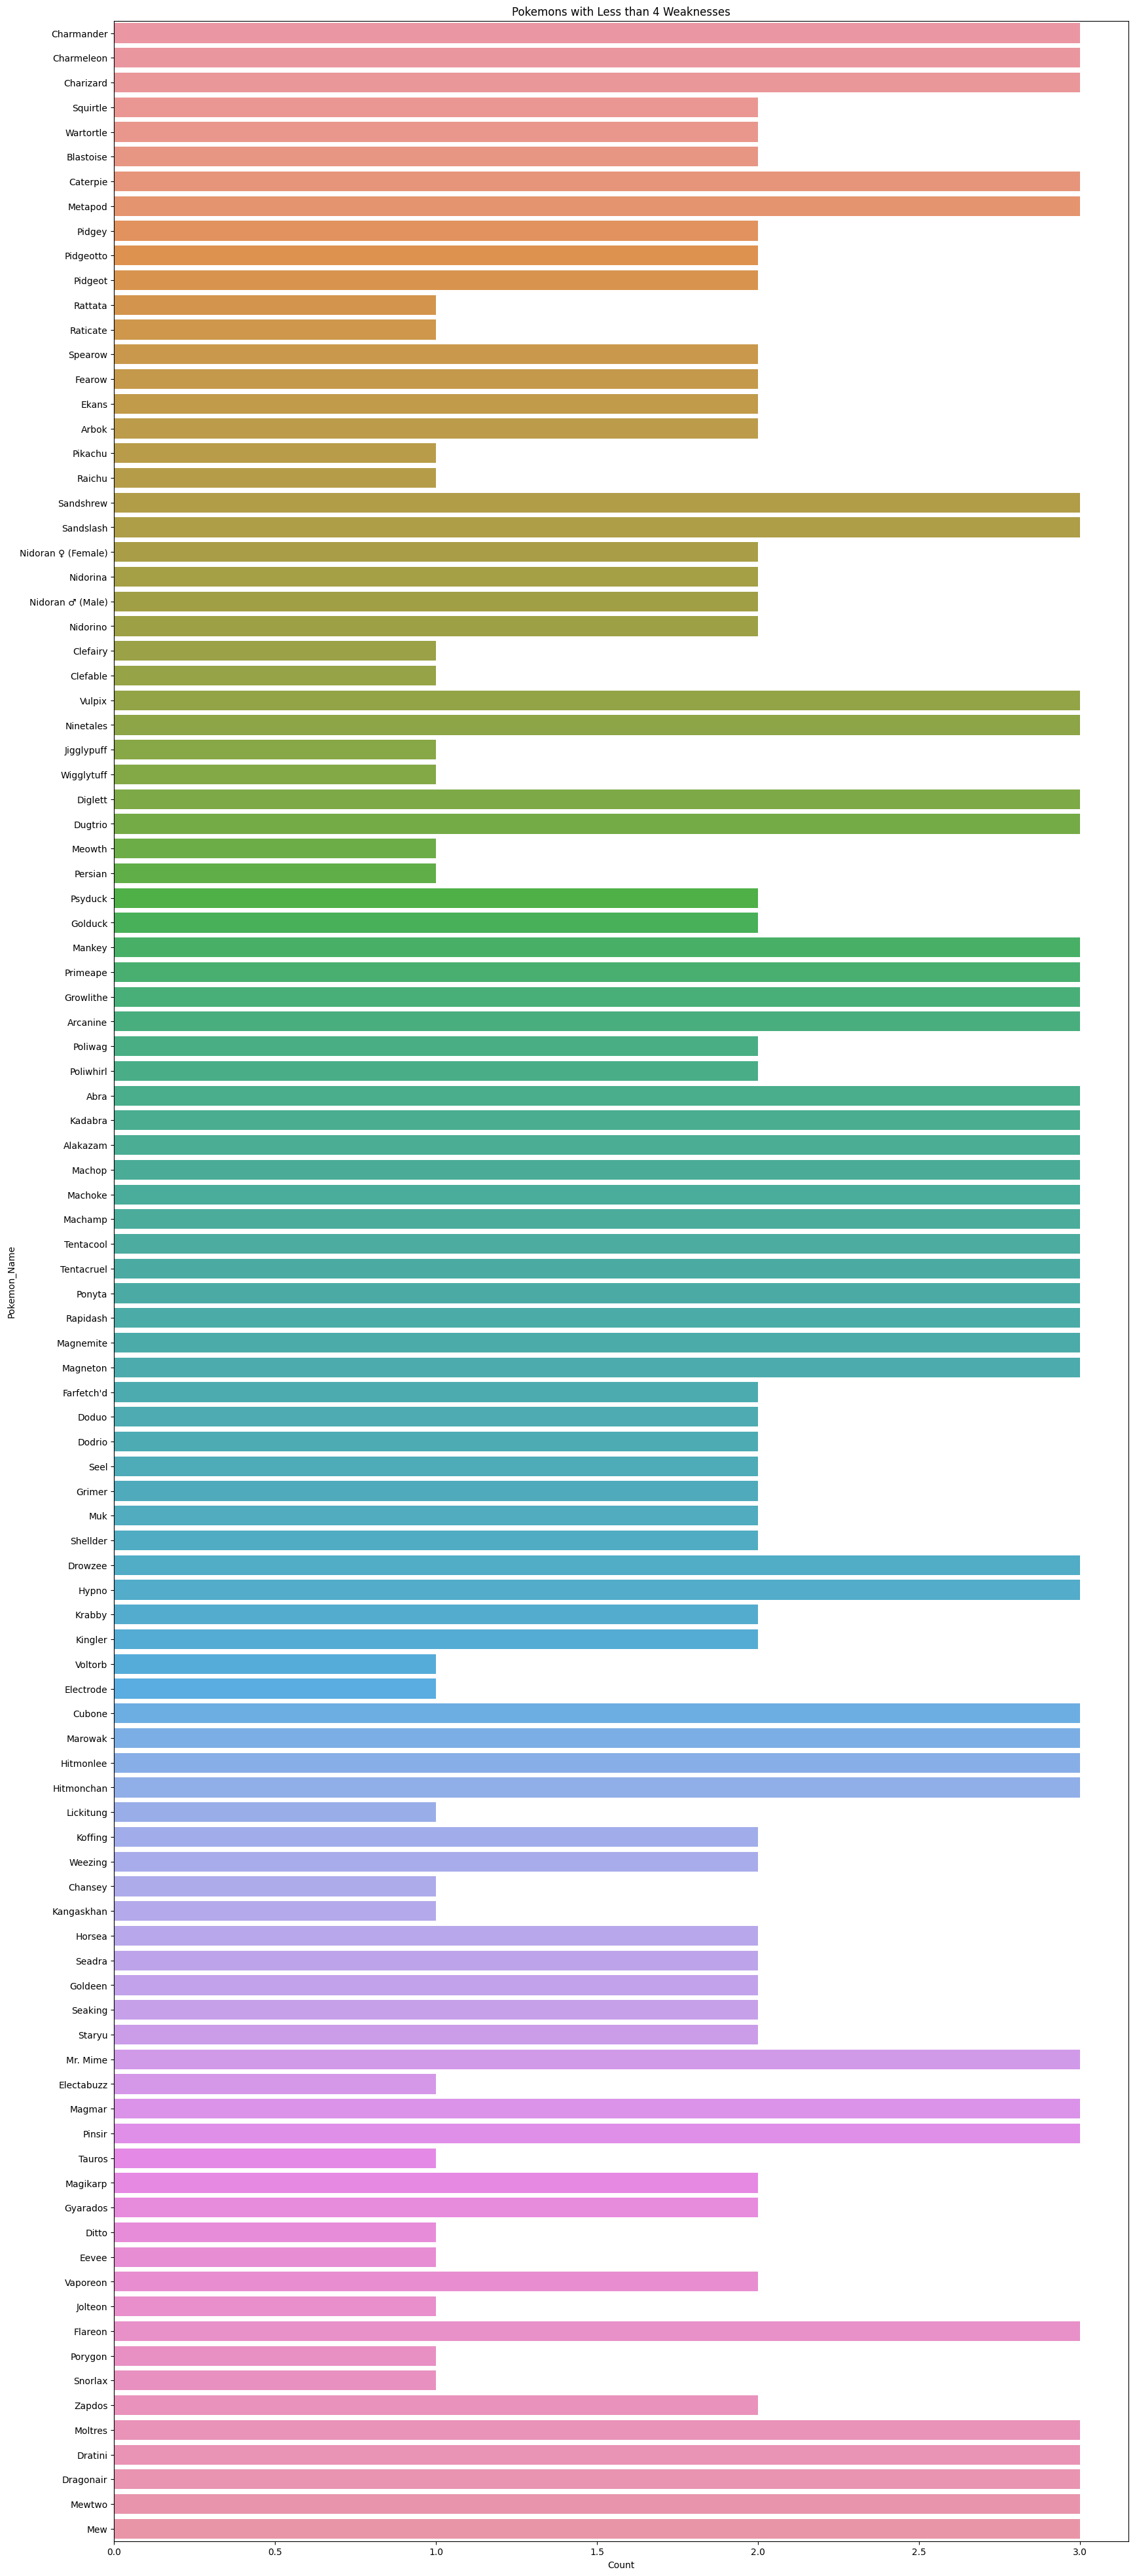

In [38]:
# Create a countplot
plt.figure(figsize=(20, 50))
sns.barplot(y='name',x='weakness_count', data=Pokemons_less_than_4_weaknesses)

# Customize the plot
plt.title('Pokemons with Less than 4 Weaknesses')
plt.xlabel('Count')
plt.ylabel('Pokemon_Name')

# Display the plot
plt.show()


### Get all Pokemons that have no multipliers at all

In [47]:
Pokemons_no_multipliers = df[df['multipliers'].isnull()]
Pokemons_no_multipliers['name']

2        Venusaur
5       Charizard
8       Blastoise
11     Butterfree
14       Beedrill
          ...    
144        Zapdos
145       Moltres
148     Dragonite
149        Mewtwo
150           Mew
Name: name, Length: 81, dtype: object

### Get all Pokemons that do not have more than 2 evolutions

In [67]:
df['candy_count'] = df['candy'].str.count(' ') + 1 # space count in candy column
df['candy_count'].value_counts

<bound method IndexOpsMixin.value_counts of 0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
146    2.0
147    2.0
148    2.0
149    NaN
150    NaN
Name: candy_count, Length: 151, dtype: float64>

In [69]:
Pokemons_not_have_more_2_evolutions = df[df['candy_count'] <=2]
Pokemons_not_have_more_2_evolutions = Pokemons_not_have_more_2_evolutions[['name','candy','candy_count']]
Pokemons_not_have_more_2_evolutions

,name,candy,candy_count
0,Bulbasaur,Bulbasaur Candy,2.0
1,Ivysaur,Bulbasaur Candy,2.0
2,Venusaur,Bulbasaur Candy,2.0
3,Charmander,Charmander Candy,2.0
4,Charmeleon,Charmander Candy,2.0
...,...,...,...
139,Kabuto,Kabuto Candy,2.0
140,Kabutops,Kabuto Candy,2.0
146,Dratini,Dratini Candy,2.0
147,Dragonair,Dratini Candy,2.0


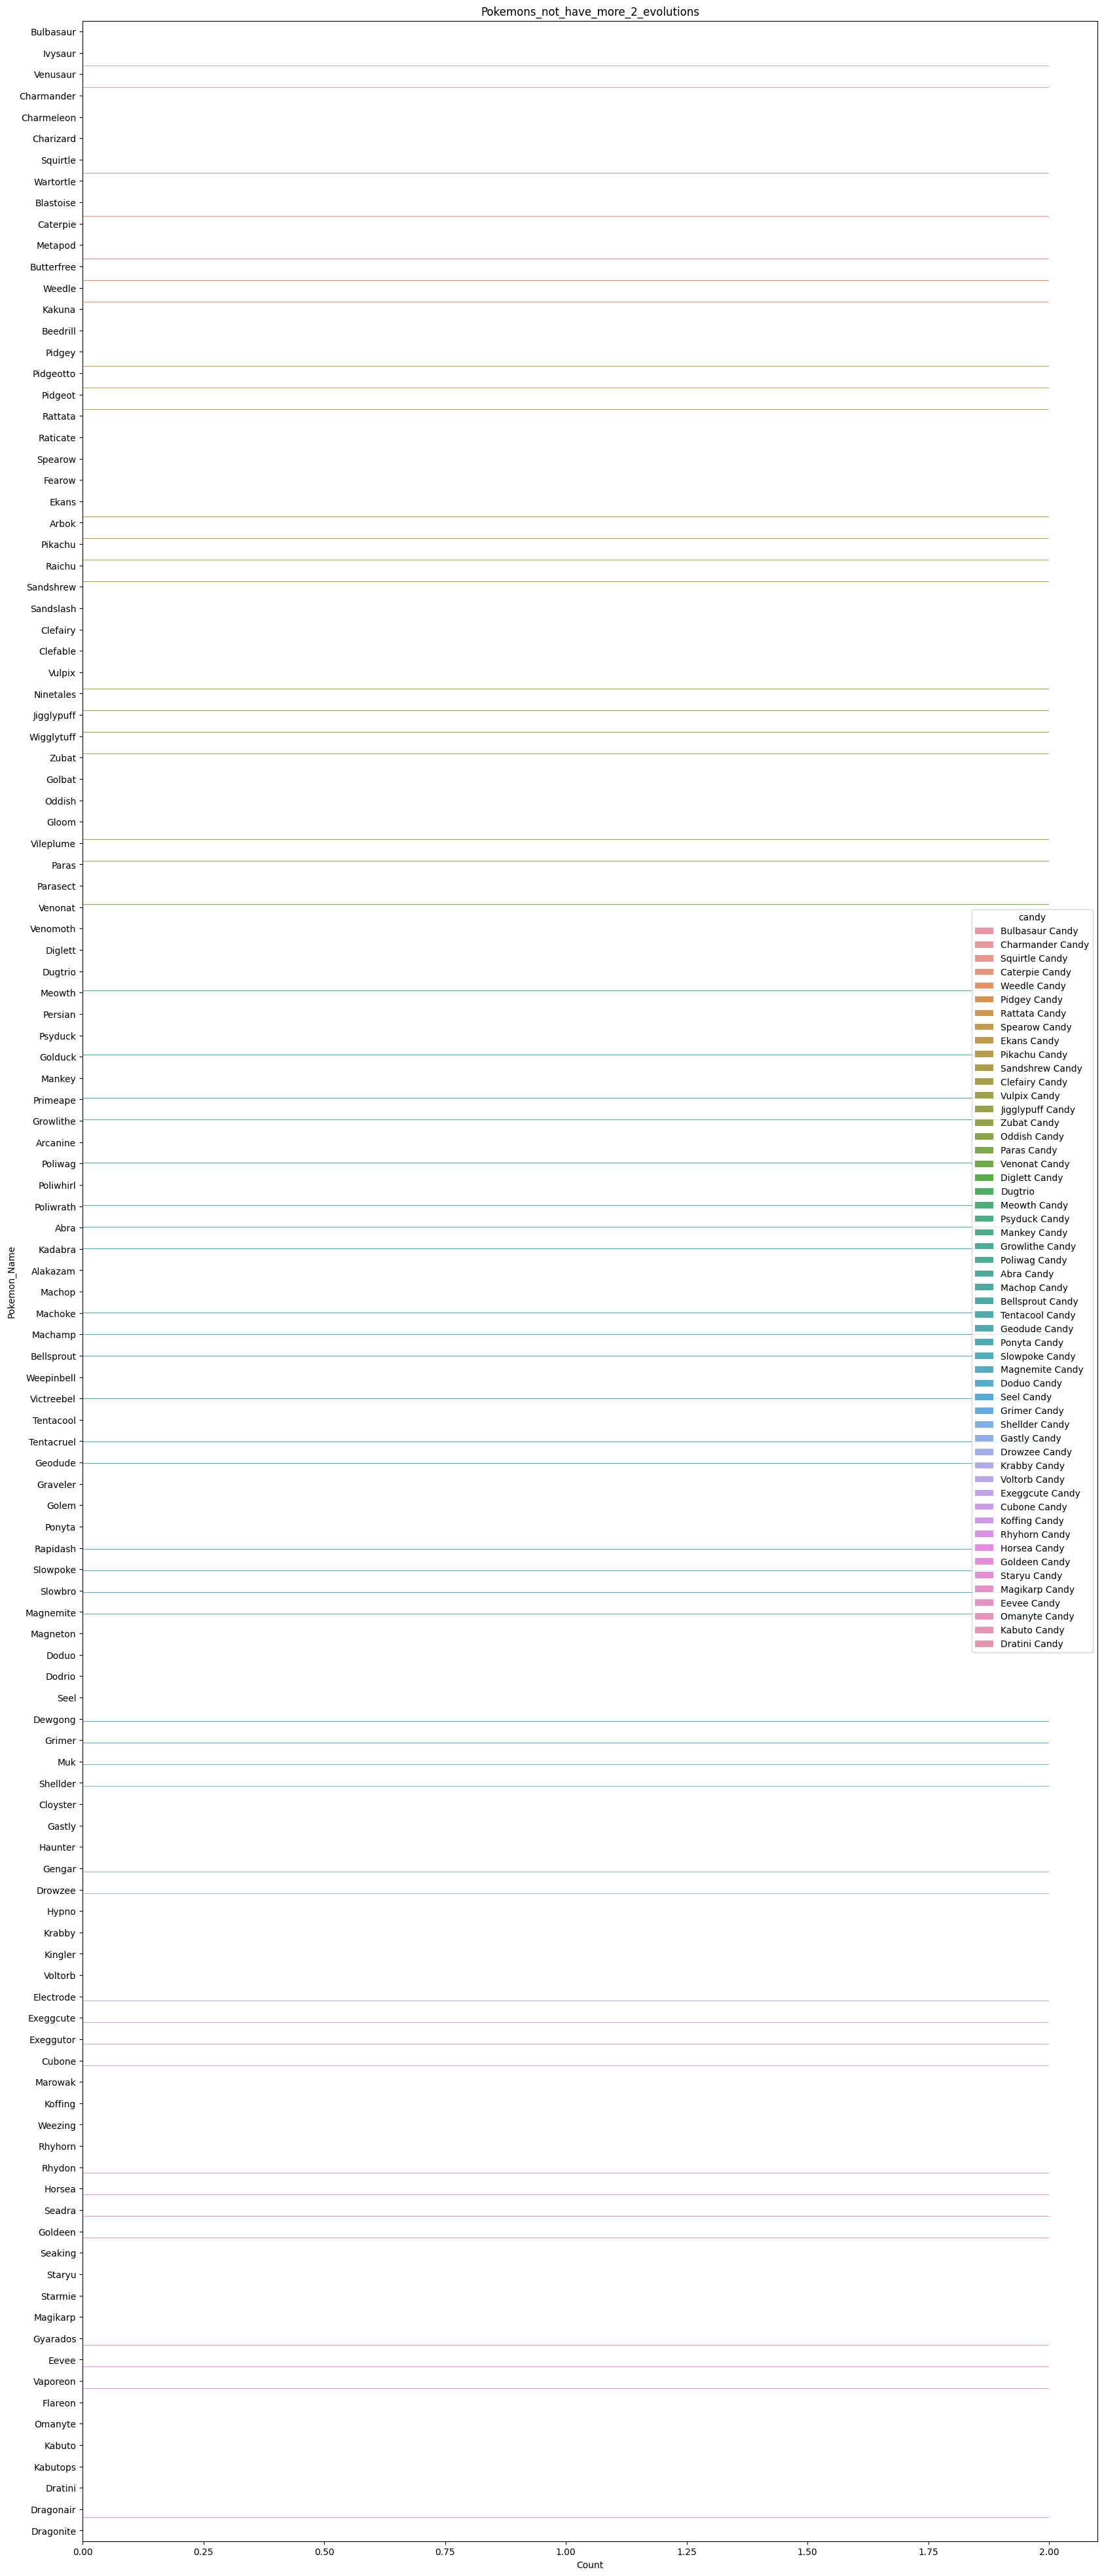

In [72]:
# Create a barplot
plt.figure(figsize=(20, 50))
sns.barplot(y='name',x='candy_count',hue='candy' ,data=Pokemons_not_have_more_2_evolutions)

# Customize the plot
plt.title('Pokemons_not_have_more_2_evolutions')
plt.xlabel('Count')
plt.ylabel('Pokemon_Name')

# Display the plot
plt.show()

### Get all Pokemons whose spawn time is less than 300 seconds.

In [80]:
df['total_seconds'] = (
    df['spawn_time']
    .fillna('00:00:00')  # Replace missing values with '00:00:00'
    .astype(str)  # Convert values to strings
    .str.split(':')
    .apply(lambda x: int(x[0]) * 60 + int(x[1]))
    )

In [83]:
Pokemons_time_less_300_seconds=df[df['total_seconds'] < 300]
Pokemons_time_less_300_seconds = Pokemons_time_less_300_seconds[['name','total_seconds']]
Pokemons_time_less_300_seconds

,name,total_seconds
6,Squirtle,265
8,Blastoise,6
10,Metapod,131
12,Weedle,141
13,Kakuna,150
...,...,...
143,Articuno,0
144,Zapdos,0
145,Moltres,0
149,Mewtwo,0


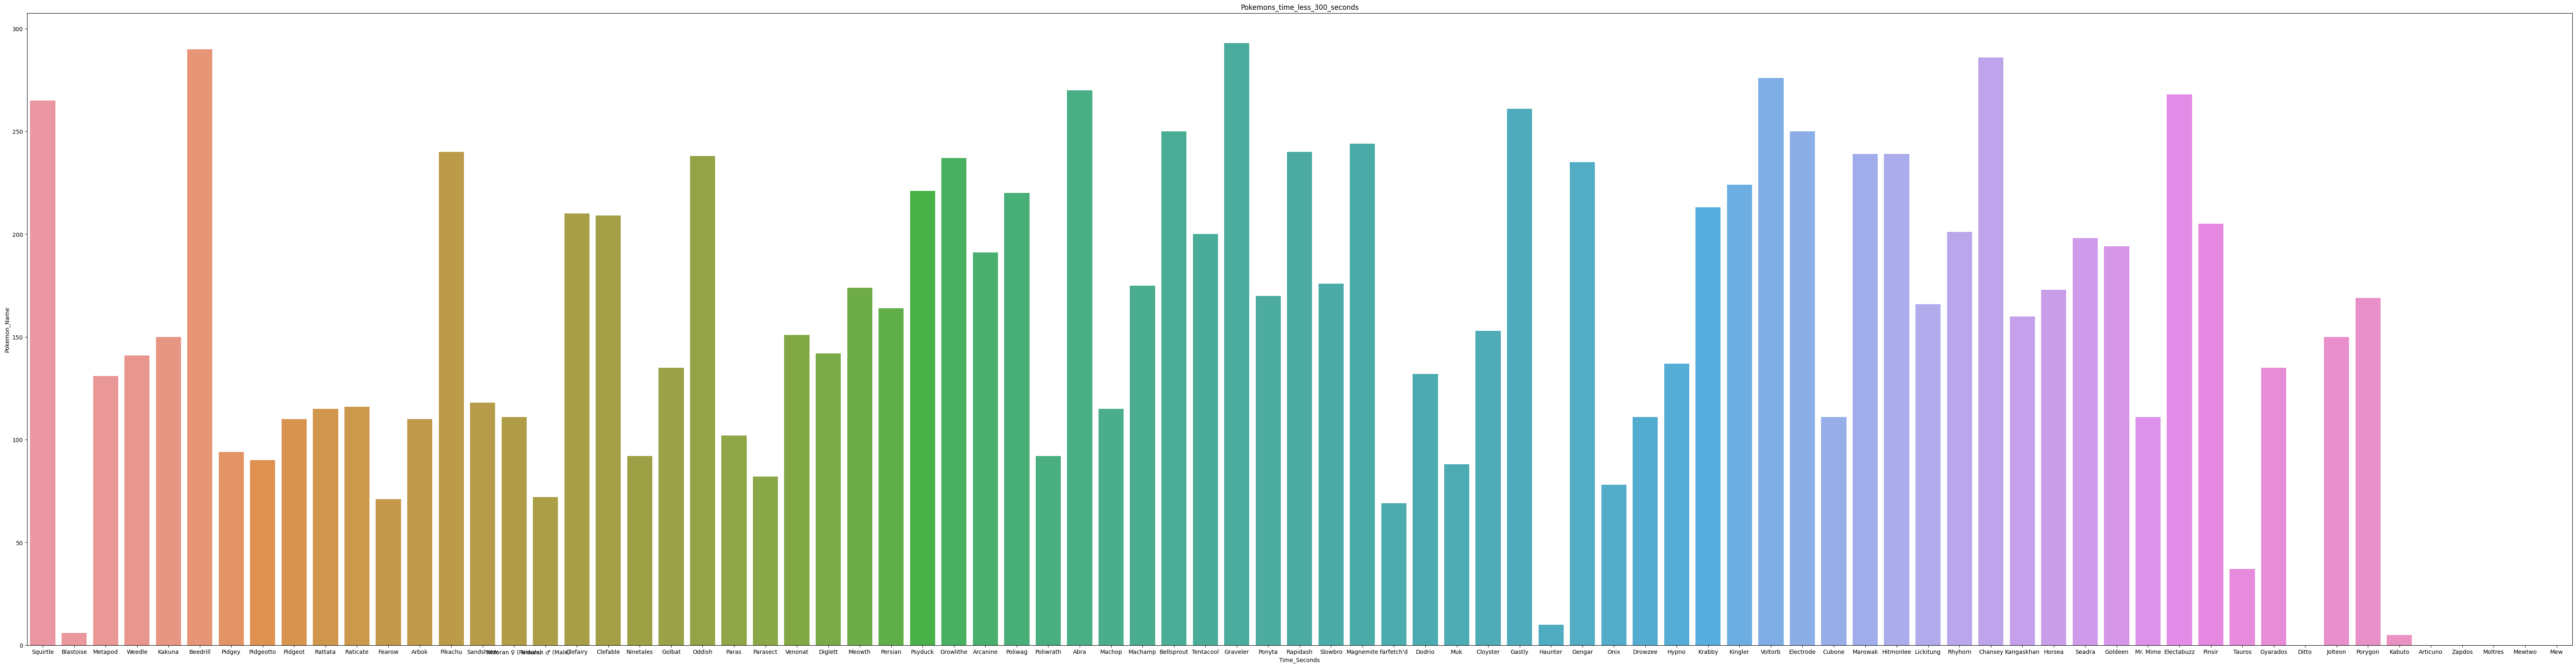

In [86]:
# Create a barplot
plt.figure(figsize=(80, 20))
sns.barplot(x='name',y='total_seconds' ,data=Pokemons_time_less_300_seconds)

# Customize the plot
plt.title('Pokemons_time_less_300_seconds')
plt.xlabel('Pokemon_Name')
plt.ylabel('Time_Seconds')

# Display the plot
plt.show()

### Get all Pokemon who have more than two types of capabilities


In [105]:
# Split the 'Type' column into separate types
df[df['type'].str.count(',') > 1]

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weakness,total_seconds,types


#### There is No Pokemons whos has more than two types of capabilities 